
### WIP - Data about Covid 19 in Brazil.
### Obs: The dataset used in this analysis could be downloaded at https://covid.saude.gov.br/
####  All charts created in this analysis, can be found in Charts/BrazilData folder, in a folder with the state abbreviation name.

In [1]:
import pandas as pd 
import numpy as np
import csv
import json
import requests
import urllib.request as downloader
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import datetime
import seaborn as sns

database = pd.read_excel('Data/HIST_PAINEL_COVIDBR_05jul2020.xlsx')

In [2]:
def downloadFile(url):
    import datetime 
    today = datetime.datetime.now()
    try:
        print('Downloading Dataset')

        r = requests.get(url, allow_redirects=True)
        open('Data/HIST_PAINEL_COVIDBR_TODAY.csv', 'wb').write(r.content)
        print('Done!')
        print('Build Date: %s'%today)
    except e:
        print(e)
        
def getFile(url):
    import datetime 
    today = datetime.datetime.now()
    r = requests.get(url, allow_redirects=True)

    open('Data/HIST_PAINEL_COVIDBR_TODAY.xlsx', 'wb').write(r.content)
    print('Done!')
    print('Build Date: %s'%today)
    
import urllib.request
def getFileCSV(url):
    import datetime 
    today = datetime.datetime.now()
    print('Beginning file download with urllib2...')

    urllib.request.urlretrieve(url, 'Data/Covid19Brasil.csv')
    print('Done!')
    print('Build Date: %s'%today)

In [3]:
# import requests
# import json
# url = 'https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalGeralApi'
# response=requests.get(url)
# response.json()

# link_data = response.json()['planilha']['arquivo']['url']
# link_data
# #WRONG DATA!.

In [4]:
# url = 'https://brasil.io/dataset/covid19/caso_full/?format=csv'

# downloadFile(url)


In [5]:
# database = pd.read_csv('Data/HIST_PAINEL_COVIDBR_TODAY.csv', sep=',')

In [6]:
database.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

In [7]:
database.tail(7)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
548786,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-29,27,3015268,47071,2166,559,11,NaN,NaN,1.0
548787,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-30,27,3015268,49218,2147,587,28,NaN,NaN,1.0
548788,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-01,27,3015268,50676,1458,620,33,NaN,NaN,1.0
548789,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-02,27,3015268,52281,1605,631,11,NaN,NaN,1.0
548790,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-03,27,3015268,53996,1715,643,12,NaN,NaN,1.0
548791,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-04,27,3015268,55760,1764,671,28,NaN,NaN,1.0
548792,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-05,28,3015268,57854,2094,699,28,NaN,NaN,1.0


In [8]:
database.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,548793.000000,545097.000000,542976.000000,548793.000000,5.487930e+05,548793.000000,548793.000000,548793.000000,78.000000,78.00000,542976.000000
mean,32.100590,322679.308319,32143.934710,20.410834,2.450486e+02,8.763168,12.262835,0.354598,277184.397436,264184.50000,0.071429
std,9.793047,97617.636724,9742.996224,4.189047,9.251480e+03,301.223114,445.436083,11.353773,265322.131222,196480.52611,0.257540
min,11.000000,110000.000000,11001.000000,9.000000,0.000000e+00,-1812.000000,0.000000,-221.000000,22130.000000,14062.00000,0.000000
25%,25.000000,250980.000000,25008.000000,17.000000,0.000000e+00,0.000000,0.000000,0.000000,59894.000000,78007.25000,0.000000
50%,31.000000,314160.000000,31051.000000,20.000000,1.000000e+00,0.000000,0.000000,0.000000,172125.500000,226728.00000,0.000000
75%,41.000000,411330.000000,41011.000000,24.000000,1.300000e+01,0.000000,0.000000,0.000000,434359.750000,436114.25000,0.000000
max,76.000000,530010.000000,53001.000000,28.000000,1.603055e+06,54771.000000,64867.000000,1473.000000,906286.000000,636380.00000,1.000000


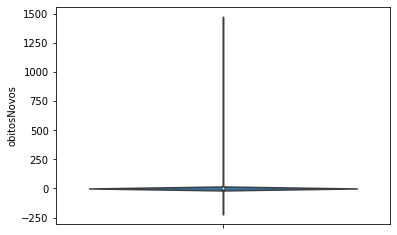

In [9]:

sns.violinplot(x=database['obitosNovos'], orient='vertical')

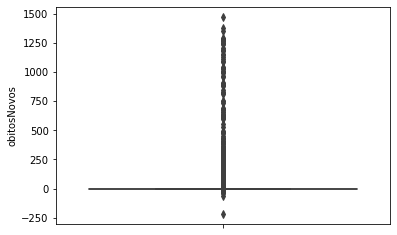

In [10]:
import seaborn as sns

sns.boxplot(x=database['obitosNovos'], orient='vertical')

0:00:07.275489


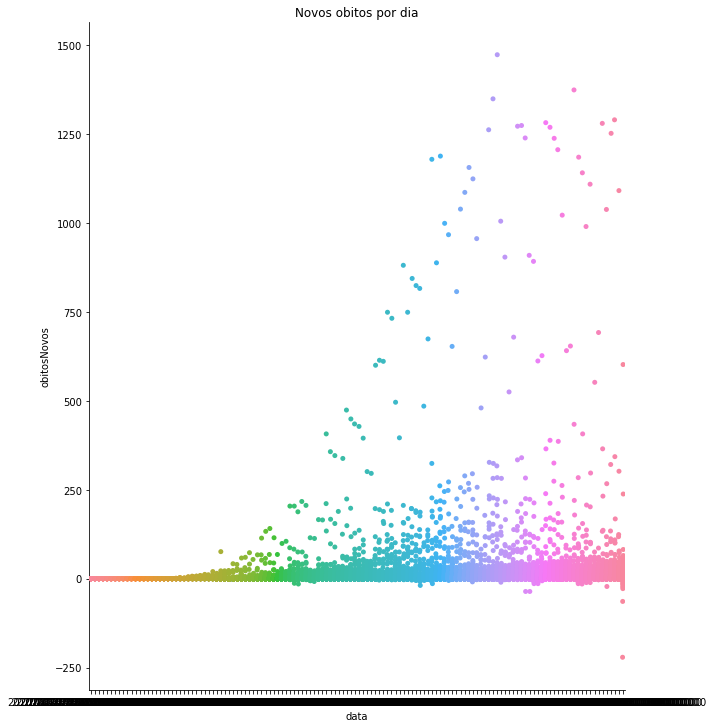

In [11]:
import datetime

import matplotlib.dates as mdates
start = datetime.datetime.now()

sns.catplot(x='data', y='obitosNovos', data=database, height=10, aspect=1)
plt.title("Novos obitos por dia");
print(datetime.datetime.now() - start)

In [12]:
sp = database.query("estado == 'SP'")

In [13]:

#sp['obitosNovos'].plot(kind='bar', figsize=(17,10), rot=90)
#plt.title('COVID-19 Brazil')
#plt.ylabel('Quantity')
#plt.xlabel('Date')



In [14]:
sp['obitosNovos'].sum()

32156

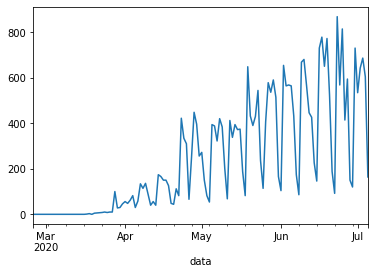

In [15]:
quantity = sp.groupby('data').obitosNovos.sum()
quantity.plot()

Text(0.5, 1.0, 'Novos obitos nos ultimos 5 dias em SP')

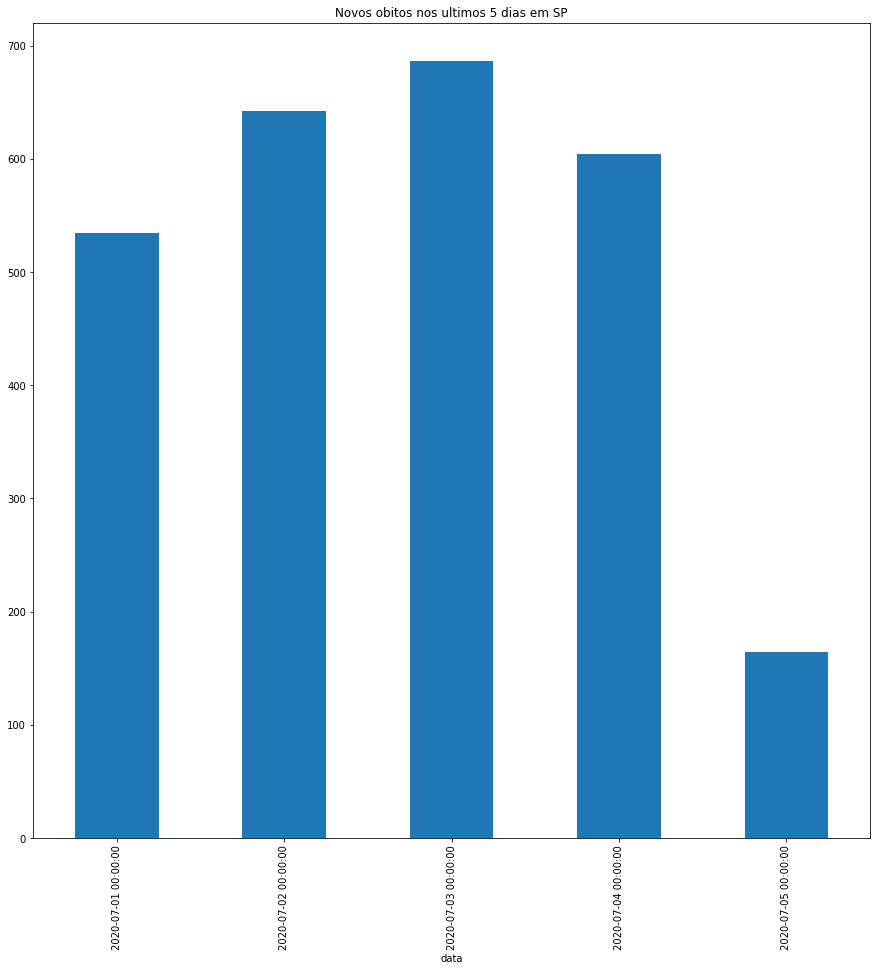

In [16]:
quantity.tail().plot(kind='bar', rot=90, figsize=(15,15))
plt.title('Novos obitos nos ultimos 5 dias em SP')

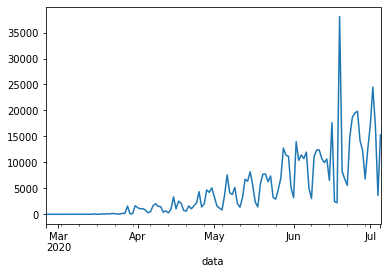

In [17]:
casesQuantity = sp.groupby('data').casosNovos.sum()
casesQuantity.plot()

Text(0.5, 1.0, 'Novos casos nos ultimos 5 dias em SP')

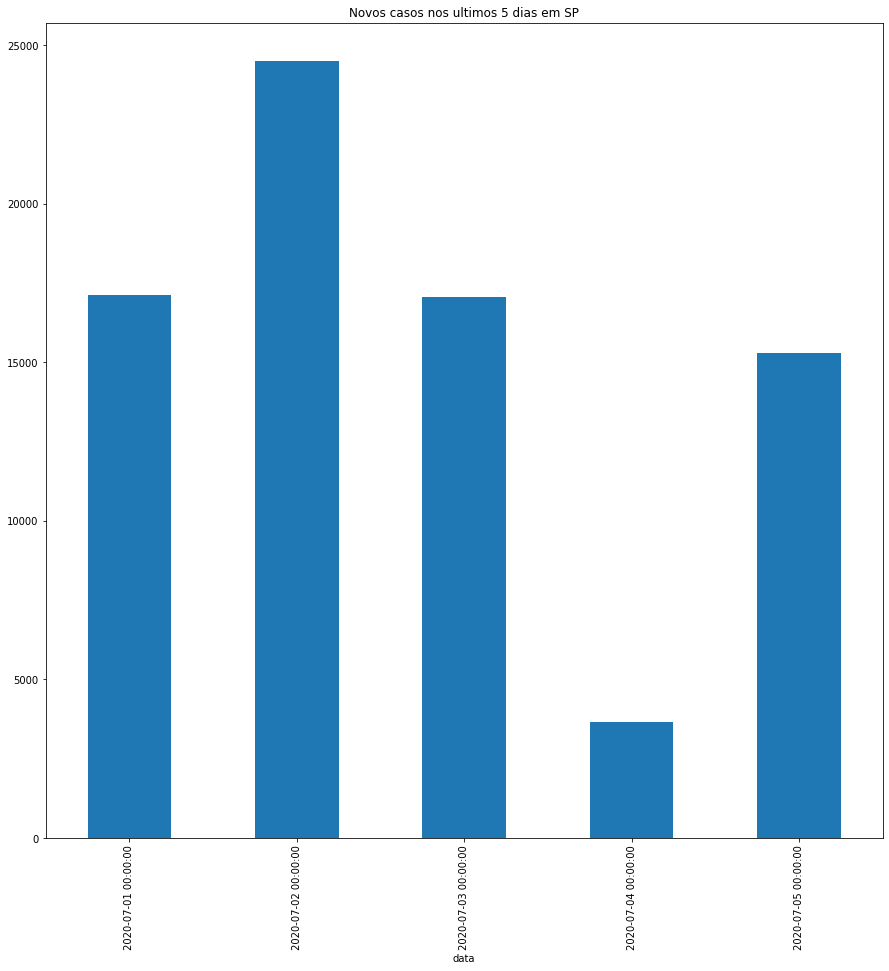

In [18]:

casesQuantity.tail().plot(kind='bar', rot=90, figsize=(15,15))
plt.title('Novos casos nos ultimos 5 dias em SP')

In [19]:
'''
    Use this function to return a UF. 
    parameters:
        dataframe:: Used Dataframe
        uf:: state abbreviation
    
    return:: Dataframe
'''
def getDataByUF(dataframe, uf):
    data = dataframe.query("estado == '%s'" % uf)
    return data;

In [20]:
def plotNewCasesFiveDays(dataframe):
    uf = sp.estado.iloc[0]
    casesQuantity.tail().plot(kind='bar', rot=90, figsize=(15,15))
    plt.xlabel("Data")
    plt.ylabel("Quantidade")
    plt.title('Novos casos nos ultimos 5 dias em %s' % uf)

In [21]:
sp = getDataByUF(database, 'SP')

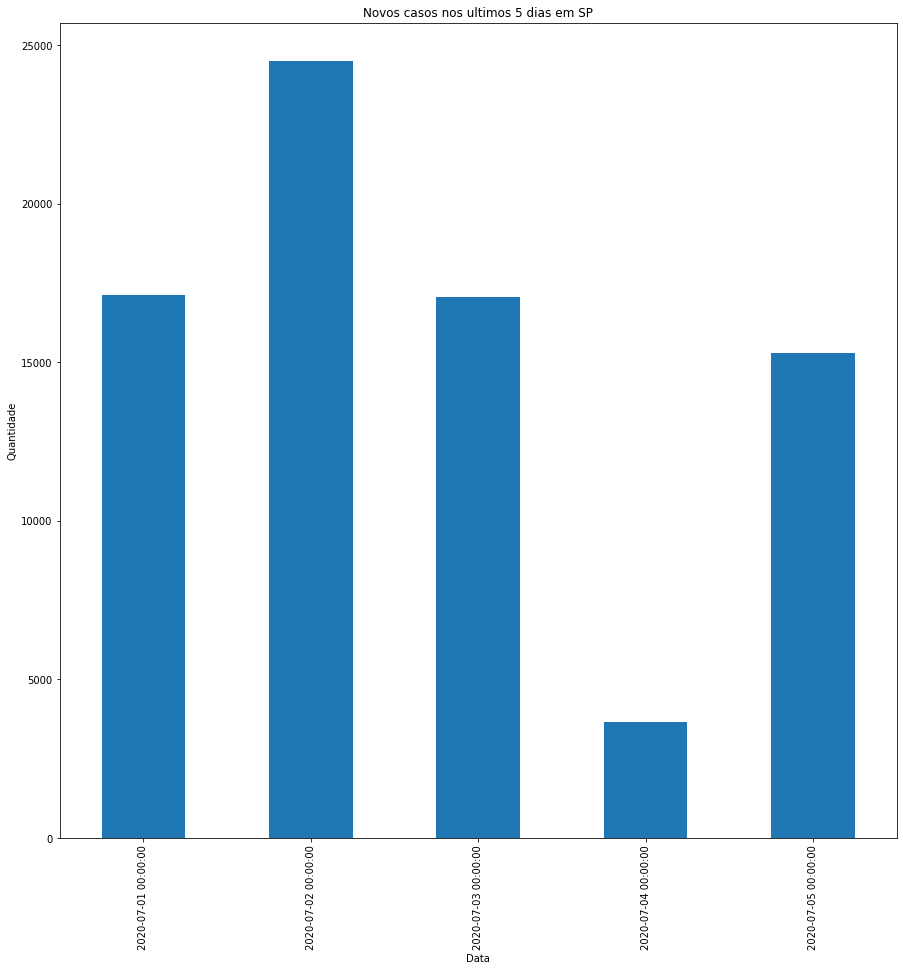

In [22]:
plotNewCasesFiveDays(sp)

In [23]:
''' Create a directory in charts folder with the parameter dirName
    parameters:: dirName -> str 
'''
def createDir(dirName):
    import os
    try:
        os.mkdir('Charts/BrazilData/'+dirName)
        print("Directory " , dirName ,  " Created ")
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")
  

In [24]:
database.estado.unique()

array([nan, 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [25]:
lista = database.estado.dropna().unique()

In [26]:
lista

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [27]:
#Generating charts by State Dynamically.
def plotNewCasesByUF(dataframe, lista):
    for state in lista:
        stateData = getDataByUF(dataframe, state)
        createDir(state)
        
        stateNewCases = stateData.groupby('data').casosNovos.sum()
        stateNewCases.tail(7).plot(kind='bar', rot=90, figsize=(15,15))
        plt.xlabel("Data")
        plt.ylabel("Quantidade")
        plt.title('Novos casos nos ultimos 7 dias em %s' % state)
        plt.savefig('Charts/BrazilData/'+state+'/'+'%s'%state+'- Novos casos nos ultimos 7 dias em %s' % state +'.png')


#Generating charts by State Dynamically.
def plotNewDeathsByUF(dataframe, lista):
    for state in lista:
        stateData = getDataByUF(dataframe, state)
        createDir(state)
        
        stateNewCases = stateData.groupby('data').obitosNovos.sum()
        stateNewCases.tail(7).plot(kind='bar', rot=90, figsize=(15,15))
        plt.xlabel("Data")
        plt.ylabel("Quantidade")
        plt.title('Novos obitos nos ultimos 7 dias em %s' % state)
        plt.savefig('Charts/BrazilData/'+state+'/'+'%s'%state+'- Novos obitos nos ultimos 7 dias em %s' % state+'.png')

        
    
#Generating charts by State Dynamically.
def plotAccumulatedCasesByUF(dataframe, lista):
    for state in lista:
        stateData = getDataByUF(dataframe, state)
        createDir(state)
        
        stateNewCases = stateData.groupby('data').casosAcumulado.sum()
        stateNewCases.tail(7).plot(kind='bar', rot=90, figsize=(15,15))
        plt.xlabel("Data")
        plt.ylabel("Quantidade")
        plt.title('Casos acumulados nos ultimos 7 dias em %s' % state)
        plt.savefig('Charts/BrazilData/'+state+'/'+'%s'%state+'- Casos acumulados nos ultimos 7 dias em %s' % state+'.png')

def plotAccumulatedDeathsByUF(dataframe, lista):
    for state in lista:
        stateData = getDataByUF(dataframe, state)
        createDir(state)
        
        stateNewCases = stateData.groupby('data').obitosAcumulado.sum()
        stateNewCases.tail(7).plot(kind='bar', rot=90, figsize=(15,15))
        plt.xlabel("Data")
        plt.ylabel("Quantidade")
        plt.title('Casos acumulados nos ultimos 7 dias em %s' % state)
        plt.savefig('Charts/BrazilData/'+state+'/'+'%s'%state+'- Obitos acumulados nos ultimos 7 dias em %s' % state+'.png')

        
def plotNewRecoveredByUF(dataframe, lista):
    for state in lista:
        stateData = getDataByUF(dataframe, state)
        createDir(state)
        
        stateNewCases = stateData.groupby('data').Recuperadosnovos.sum()
        stateNewCases.tail(7).plot(kind='bar', rot=90, figsize=(15,15))
        plt.xlabel("Data")
        plt.ylabel("Quantidade")
        plt.title('Novos recuperados nos ultimos 7 dias em %s' % state)
        plt.savefig('Charts/BrazilData/'+state+'/'+'%s'%state+'- Novos recuperados nos ultimos 7 dias em %s' % state+'.png')
           
def plotUnderSupervisionCasesByUF(dataframe, lista):
    for state in lista:
        stateData = getDataByUF(dataframe, state)
        createDir(state)
        
        stateNewCases = stateData.groupby('data').emAcompanhamentoNovos.sum()
        stateNewCases.tail(7).plot(kind='bar', rot=90, figsize=(15,15))
        plt.xlabel("Data")
        plt.ylabel("Quantidade")
        plt.title('Casos em acompanhamento ultimos 7 dias em %s' % state)
        plt.savefig('Charts/BrazilData/'+state+'/'+'%s'%state+'- Casos em acompanhamento nos ultimos 7 dias em %s' % state+'.png')
           
    
    
    


Directory  RO  already exists
Directory  AC  already exists
Directory  AM  already exists
Directory  RR  already exists
Directory  PA  already exists
Directory  AP  already exists
Directory  TO  already exists
Directory  MA  already exists
Directory  PI  already exists
Directory  CE  already exists
Directory  RN  already exists
Directory  PB  already exists
Directory  PE  already exists
Directory  AL  already exists
Directory  SE  already exists
Directory  BA  already exists
Directory  MG  already exists
Directory  ES  already exists
Directory  RJ  already exists
Directory  SP  already exists
Directory  PR  already exists
Directory  SC  already exists
Directory  RS  already exists
Directory  MS  already exists
Directory  MT  already exists
Directory  GO  already exists
Directory  DF  already exists


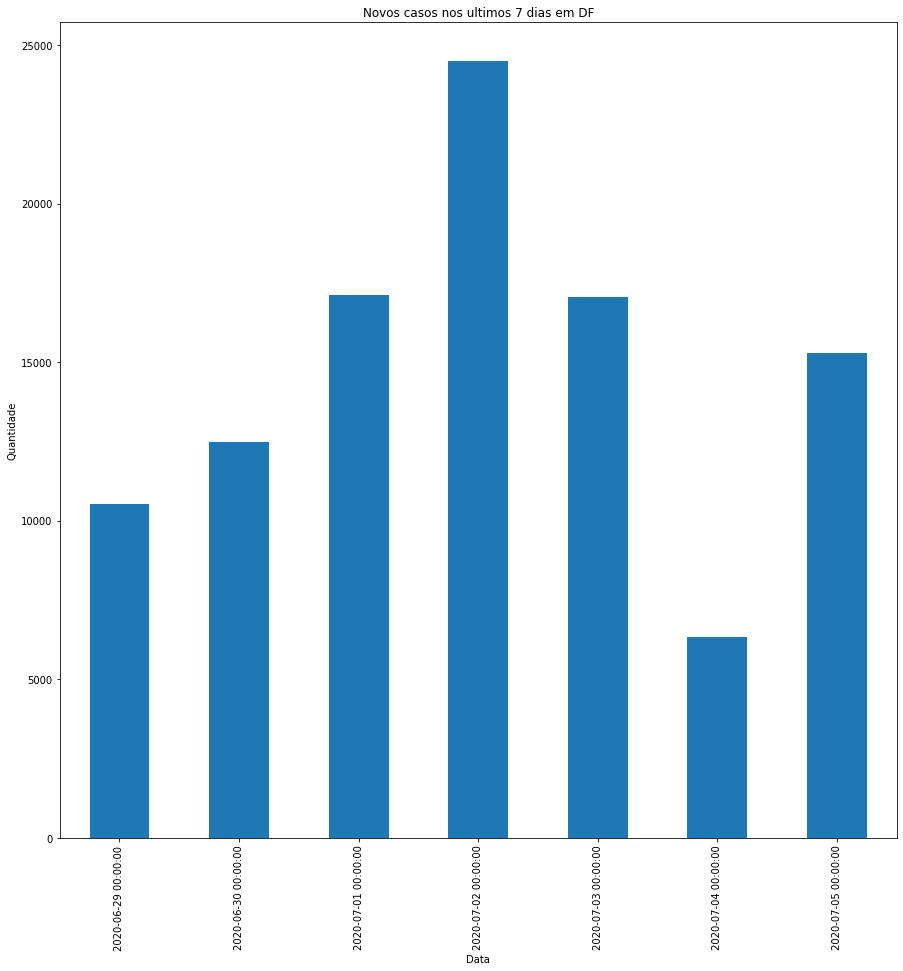

In [28]:
'''
       Plotting chart using the list with states. Foreach state, a new chart with their info is 
       saved in folder with the state abbreviation name.
'''
plotNewCasesByUF(database, lista)

Directory  RO  already exists
Directory  AC  already exists
Directory  AM  already exists
Directory  RR  already exists
Directory  PA  already exists
Directory  AP  already exists
Directory  TO  already exists
Directory  MA  already exists
Directory  PI  already exists
Directory  CE  already exists
Directory  RN  already exists
Directory  PB  already exists
Directory  PE  already exists
Directory  AL  already exists
Directory  SE  already exists
Directory  BA  already exists
Directory  MG  already exists
Directory  ES  already exists
Directory  RJ  already exists
Directory  SP  already exists
Directory  PR  already exists
Directory  SC  already exists
Directory  RS  already exists
Directory  MS  already exists
Directory  MT  already exists
Directory  GO  already exists
Directory  DF  already exists


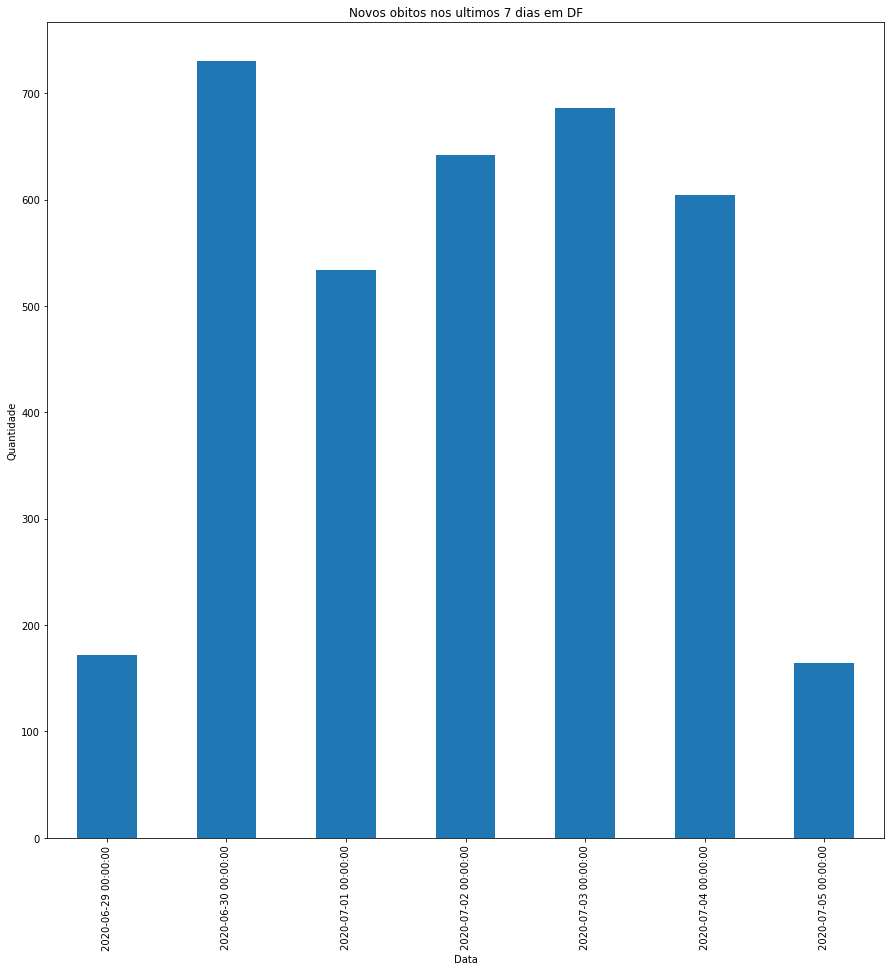

In [29]:
plotNewDeathsByUF(database, lista)

Directory  RO  already exists
Directory  AC  already exists
Directory  AM  already exists
Directory  RR  already exists
Directory  PA  already exists
Directory  AP  already exists
Directory  TO  already exists
Directory  MA  already exists
Directory  PI  already exists
Directory  CE  already exists
Directory  RN  already exists
Directory  PB  already exists
Directory  PE  already exists
Directory  AL  already exists
Directory  SE  already exists
Directory  BA  already exists
Directory  MG  already exists
Directory  ES  already exists
Directory  RJ  already exists
Directory  SP  already exists
Directory  PR  already exists
Directory  SC  already exists
Directory  RS  already exists
Directory  MS  already exists
Directory  MT  already exists
Directory  GO  already exists
Directory  DF  already exists


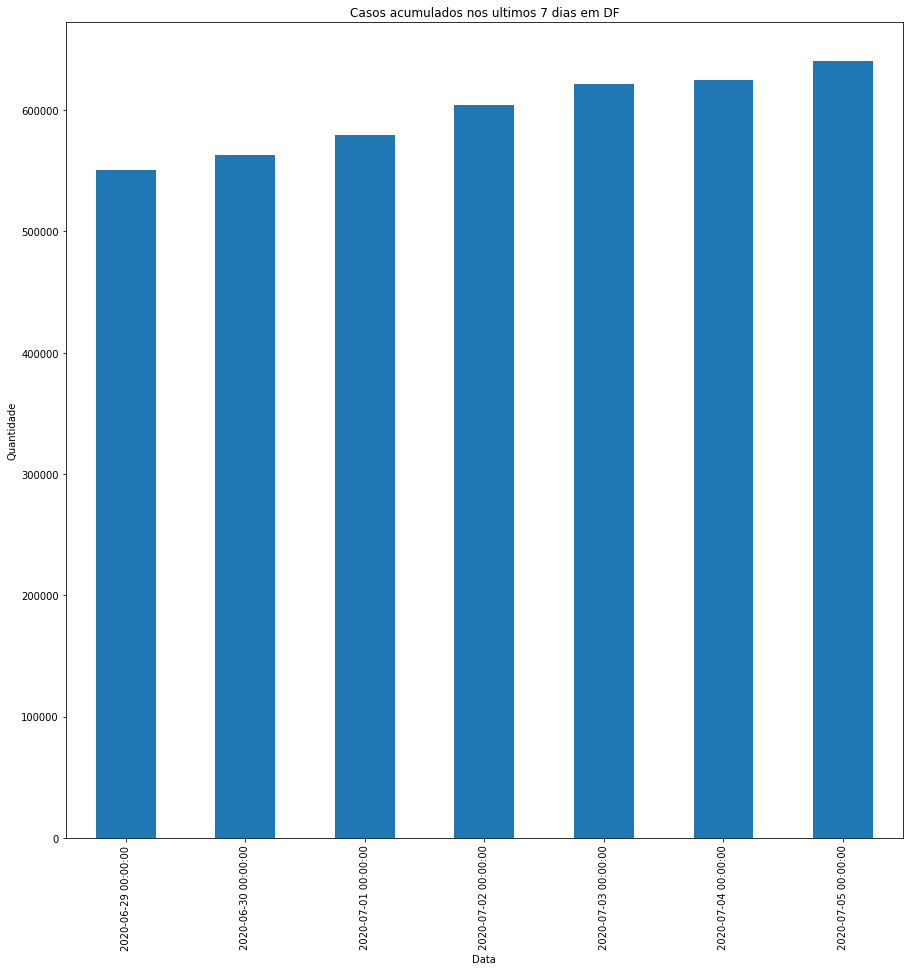

In [30]:
plotAccumulatedCasesByUF(database, lista)

Directory  RO  already exists
Directory  AC  already exists
Directory  AM  already exists
Directory  RR  already exists
Directory  PA  already exists
Directory  AP  already exists
Directory  TO  already exists
Directory  MA  already exists
Directory  PI  already exists
Directory  CE  already exists
Directory  RN  already exists
Directory  PB  already exists
Directory  PE  already exists
Directory  AL  already exists
Directory  SE  already exists
Directory  BA  already exists
Directory  MG  already exists
Directory  ES  already exists
Directory  RJ  already exists
Directory  SP  already exists
Directory  PR  already exists
Directory  SC  already exists
Directory  RS  already exists
Directory  MS  already exists
Directory  MT  already exists
Directory  GO  already exists
Directory  DF  already exists


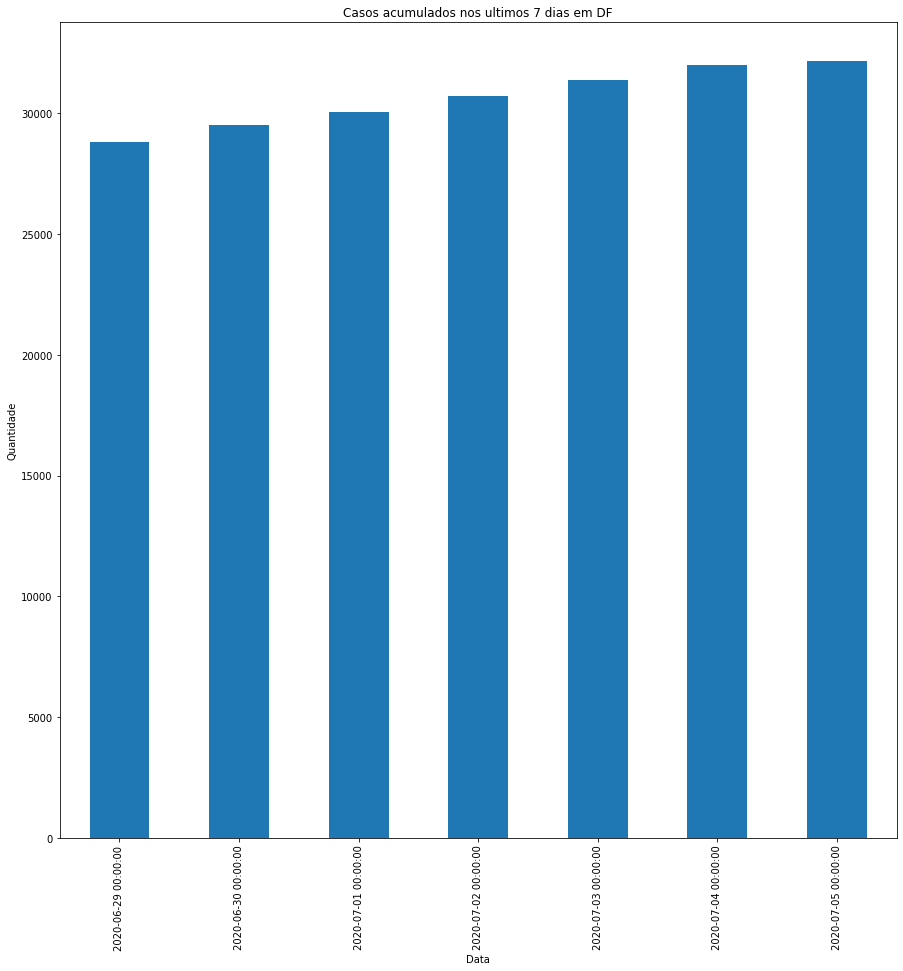

In [31]:
plotAccumulatedDeathsByUF(database, lista)